In [2]:
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\sunny\\Project1\\bulldogs-project-1'

In [3]:
# Read the input file lifeExpectancyAtBirth.csv and convert the same into a Dataframe
life_expectancy_df = pd.read_csv("Resources\lifeExpectancyAtBirth.csv")
life_expectancy_df.head()
life_expectancy_df.dtypes

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object

In [4]:
# Replaced the Column name First Tooltip to Life Expectancy
life_expectancy_df.rename(columns={'First Tooltip':'Life Expectancy'}, inplace=True)

# Created a data frame life_expectanvy_both_sex to get values for Dim 1 option of "Both sexes" and displayed the same
life_expectancy_both_sex = life_expectancy_df[life_expectancy_df['Dim1'] == "Both sexes"]

# Creating a new dataframe to only pull the data relevant to 2019
life_expectancy_2019 = life_expectancy_both_sex[life_expectancy_both_sex['Period'] == 2019]
life_expectancy_2019

,Location,Period,Indicator,Dim1,Life Expectancy
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45
...,...,...,...,...,...
2137,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95
2149,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74
2161,Yemen,2019,Life expectancy at birth (years),Both sexes,66.63
2173,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45


In [5]:
# Read the input file birthAttendedBySkilledPersonal.csv and convert the same into a Dataframe
birth_skilledprof_df = pd.read_csv("Resources/Healthcare/birthAttendedBySkilledPersonal.csv")
birth_skilledprof_df.head()

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
birth_skillprof_year = birth_skilledprof_df.replace({'Period': {2018:2019,2017:2019, 2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010}})                   
birth_skillprof_year.head()

# Further data cleaning to identify the average (mean) percentage of Birth Attended by Skilled professional  
birth_skill_prof_clean = birth_skillprof_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
birth_skill_prof_clean.columns = birth_skill_prof_clean.columns.droplevel(0)
birth_skill_prof_clean = birth_skill_prof_clean.reset_index()
birth_skill_prof_clean.rename(columns={'mean':'Birth Attended'}, inplace=True)
#birth_skill_prof_clean

# Creating a new dataframe to only pull the data relevant to 2019 for Births attended by Skilled Personal
birth_skill_prof_2019 = birth_skill_prof_clean[birth_skill_prof_clean['Period'] == 2019]
birth_skill_prof_2019

# Merging the life expectancy and birth attended by Skill Personal dataframes on Country location and year 2019 
combined_df = pd.merge(life_expectancy_2019, birth_skill_prof_2019, on = ['Location','Period'])
updated_combined_df = combined_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Birth Attended Indicator"})
updated_combined_df

,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Birth Attended Indicator,Birth Attended
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,Births attended by skilled health personnel (%),56.10
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,Births attended by skilled health personnel (%),99.80
2,Angola,2019,Life expectancy at birth (years),Both sexes,63.06,Births attended by skilled health personnel (%),46.60
3,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,Births attended by skilled health personnel (%),100.00
4,Argentina,2019,Life expectancy at birth (years),Both sexes,76.58,Births attended by skilled health personnel (%),96.15
...,...,...,...,...,...,...,...
120,United States of America,2019,Life expectancy at birth (years),Both sexes,78.50,Births attended by skilled health personnel (%),99.10
121,Uruguay,2019,Life expectancy at birth (years),Both sexes,77.10,Births attended by skilled health personnel (%),100.00
122,Uzbekistan,2019,Life expectancy at birth (years),Both sexes,73.01,Births attended by skilled health personnel (%),100.00
123,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95,Births attended by skilled health personnel (%),99.20


The r-squared is: 0.3887293420601299
The correlation coefficient between Birth attended and life expectancy is 0.62


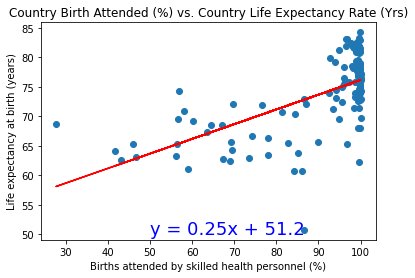

In [6]:
birth_attended = updated_combined_df['Birth Attended']
life_exp = updated_combined_df['Life Expectancy']

# Create scatter plot and linear regression of birth attended vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(birth_attended, life_exp)
regress_values = birth_attended * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(birth_attended, life_exp)
plt.plot(birth_attended, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize = 18, color = "blue")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Births attended by skilled health personnel (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Country Birth Attended (%) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Birth attended and life expectancy is {round(st.pearsonr(birth_attended, life_exp)[0],2)}")
birth_corr = st.pearsonr(birth_attended, life_exp)[0]

In [7]:
# Read the input file medicalDoctors.csv and convert the same into a Dataframe
medical_doctors_df = pd.read_csv("Resources/Healthcare/medicalDoctors.csv")

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
medical_doctor_year = medical_doctors_df.replace({'Period': {2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010,
                                                             1999:2000, 1998:2000, 1997:2000, 1996:2000, 1995:2000, 1994:2000, 1993:2000, 1992:2000, 1991:2000, 1990:2000}})                   

# Further data cleaning to identify the average (mean) percentage of Doctors Available (per 10,000 people)  
medical_doctor_clean = medical_doctor_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
medical_doctor_clean.columns = medical_doctor_clean.columns.droplevel(0)
medical_doctor_clean = medical_doctor_clean.reset_index()
medical_doctor_clean.rename(columns={'mean':'Medical Doctor Available'}, inplace=True)

# Creating a new dataframe to only pull the data relevant to 2019 for Doctors Available (per 10,000 people)  
medical_doctor_2019 = medical_doctor_clean[medical_doctor_clean['Period'] == 2019]

# Merging the life expectancy and Doctors Available (per 10,000 people) dataframes on Country location and year 2019 
combined1_df = pd.merge(life_expectancy_2019, medical_doctor_2019, on = ['Location','Period'])
updated_combined1_df = combined1_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Medical Doctor Available Indicator"})
updated_combined1_df


,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Medical Doctor Available Indicator,Medical Doctor Available
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,"Medical doctors (per 10,000)",2.78
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,"Medical doctors (per 10,000)",12.16
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,"Medical doctors (per 10,000)",18.33
3,Argentina,2019,Life expectancy at birth (years),Both sexes,76.58,"Medical doctors (per 10,000)",40.01
4,Australia,2019,Life expectancy at birth (years),Both sexes,83.04,"Medical doctors (per 10,000)",35.67
...,...,...,...,...,...,...,...
105,Uruguay,2019,Life expectancy at birth (years),Both sexes,77.10,"Medical doctors (per 10,000)",39.56
106,Vanuatu,2019,Life expectancy at birth (years),Both sexes,65.31,"Medical doctors (per 10,000)",1.65
107,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74,"Medical doctors (per 10,000)",8.28
108,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45,"Medical doctors (per 10,000)",1.63


The r-squared is: 0.5145865189777369
The correlation coefficient between Doctors available and life expectancy is 0.72


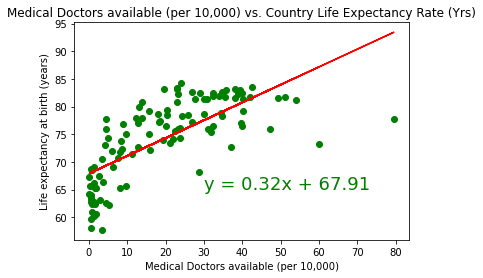

In [8]:
med_doctor = updated_combined1_df['Medical Doctor Available']
life_exp = updated_combined1_df['Life Expectancy']

# Create scatter plot and linear regression of Medical Doctors available vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(med_doctor, life_exp)
regress_values = med_doctor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(med_doctor, life_exp, color = "green")
plt.plot(med_doctor, regress_values, "r-")
plt.annotate(line_eq,(30,65),fontsize = 18, color = "green")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Medical Doctors available (per 10,000)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Medical Doctors available (per 10,000) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Doctors available and life expectancy is {round(st.pearsonr(med_doctor, life_exp)[0],2)}")
doctor_corr = st.pearsonr(med_doctor, life_exp)[0]

In [9]:
# Read the input file nursingAndMidwife.csv and convert the same into a Dataframe
nurse_midwife_df = pd.read_csv("Resources/Healthcare/nursingAndMidwife.csv")

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
nurse_midwife_year = nurse_midwife_df.replace({'Period': {2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010,
                                                             1999:2000, 1998:2000, 1997:2000, 1996:2000, 1995:2000, 1994:2000, 1993:2000, 1992:2000, 1991:2000, 1990:2000, 2018:2019, 2017:2019}})                   

# Further data cleaning to identify the average (mean) percentage of nurses and midwives available during birth  
nurse_midwife_clean = nurse_midwife_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
nurse_midwife_clean.columns = nurse_midwife_clean.columns.droplevel(0)
nurse_midwife_clean = nurse_midwife_clean.reset_index()
nurse_midwife_clean
nurse_midwife_clean.rename(columns={'mean':'Nurse and Midwife Available'}, inplace=True)

# Creating a new dataframe to only pull the data relevant to 2019 for nurses and midwives available during birth
nurse_midwife_2019 = nurse_midwife_clean[nurse_midwife_clean['Period'] == 2019]
nurse_midwife_2019

# Merging the life expectancy and Nurses and Midwives Available (per 10,000 people) dataframes on Country location and year 2019 
combined2_df = pd.merge(life_expectancy_2019, nurse_midwife_2019, on = ['Location','Period'])
updated_combined2_df = combined2_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Nurse and Midwife Available Indicator"})
updated_combined2_df

,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Nurse and Midwife Available Indicator,Nurse and Midwife Available
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,"Nursing and midwifery personnel (per 10,000)",1.620000
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,"Nursing and midwifery personnel (per 10,000)",36.500000
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,"Nursing and midwifery personnel (per 10,000)",20.046667
3,Angola,2019,Life expectancy at birth (years),Both sexes,63.06,"Nursing and midwifery personnel (per 10,000)",4.080000
4,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,"Nursing and midwifery personnel (per 10,000)",45.003333
...,...,...,...,...,...,...,...
161,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95,"Nursing and midwifery personnel (per 10,000)",9.420000
162,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74,"Nursing and midwifery personnel (per 10,000)",14.460000
163,Yemen,2019,Life expectancy at birth (years),Both sexes,66.63,"Nursing and midwifery personnel (per 10,000)",7.673333
164,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45,"Nursing and midwifery personnel (per 10,000)",9.470000


The r-squared is: 0.0806091673981194
The correlation coefficient between Nurses & Midwives available and life expectancy is 0.28


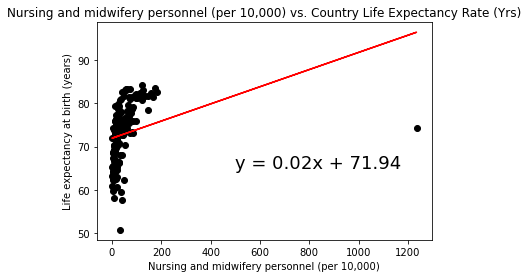

In [10]:
nurse_midwife = updated_combined2_df['Nurse and Midwife Available']
life_exp = updated_combined2_df['Life Expectancy']

# Create scatter plot and linear regression of Nurses and Midwives available vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(nurse_midwife, life_exp)
regress_values = nurse_midwife * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nurse_midwife, life_exp, color = "black")
plt.plot(nurse_midwife, regress_values, "r-")
plt.annotate(line_eq,(500,65),fontsize = 18, color = "black")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Nursing and midwifery personnel (per 10,000)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Nursing and midwifery personnel (per 10,000) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Nurses & Midwives available and life expectancy is {round(st.pearsonr(nurse_midwife, life_exp)[0],2)}")
doctor_corr = st.pearsonr(nurse_midwife, life_exp)[0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd9ba736d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd9ba73a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd9ba087b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd9ba01128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd9b9fca20>],
 'means': []}

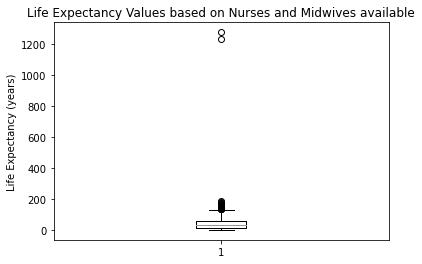

In [32]:
# Outlier Analysis for Nursing and midwife availability (per 10,000)
nurse_outlier = nurse_midwife_clean['Nurse and Midwife Available']
fig1, ax1 = plt.subplots()
ax1.set_title("Life Expectancy Values based on Nurses and Midwives available")
ax1.set_ylabel("Life Expectancy (years)")
ax1.boxplot(nurse_outlier)

# we should not be concerned with outliers in the life expectancy dataset for the year 2019 for the both sexes category
#plt.savefig('Output/Life_Expectancy_Outliers_Figure_1.png')

In [31]:
# Using the Data frames created to plot a line graphs for life expectency for multiple years on various Healthcare parameters
temporary1_df = pd.merge(life_expectancy_both_sex, birth_skill_prof_clean, on = ['Location','Period'])
temporary2_df = pd.merge(temporary1_df, medical_doctor_clean, on = ['Location','Period'])
temporary3_df = pd.merge(temporary2_df, nurse_midwife_clean, on = ['Location','Period'])
final_linechart_df = temporary3_df.drop(['Indicator_x','Dim1','Indicator_y'], axis = 1)

# Perform data cleaning to identify 5 countries with data available for years 2000, 2010, 2015 and 2019
#final_lc_clean_df = final_linechart_df.loc[(final_linechart_df['Location'] == 'Australia') | (final_linechart_df['Location'] == 'Botswana') | (final_linechart_df['Location'] == 'China') | (final_linechart_df['Location'] == 'Ireland') |
#                                           (final_linechart_df['Location'] == 'Thailand') ]
final_lc_clean_df = final_linechart_df.loc[(final_linechart_df['Location'] == "Democratic People's Republic of Korea")]
#final_lc_aus_df = final_linechart_df.loc[(final_linechart_df['Location'] == 'Australia')]
final_lc_clean_df

,Location,Period,Life Expectancy,Birth Attended,Medical Doctor Available,Nurse and Midwife Available
115,Democratic People's Republic of Korea,2019,72.63,99.50,37.010,44.490
116,Democratic People's Republic of Korea,2010,70.18,98.55,32.285,40.565


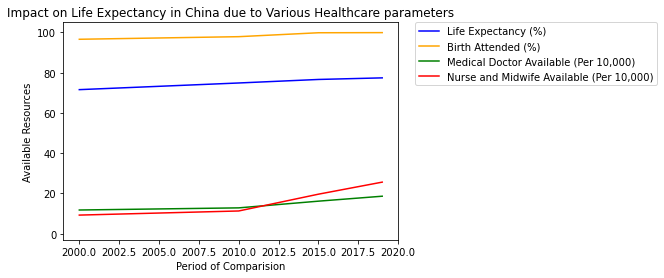

In [30]:
x_axis = final_lc_clean_df['Period']
y_axis_life_expectancy = final_lc_clean_df['Life Expectancy']
y_axis_birth_attended = final_lc_clean_df['Birth Attended']
y_axis_med_doctor = final_lc_clean_df['Medical Doctor Available']
y_axis_nurse_midwives = final_lc_clean_df['Nurse and Midwife Available']

life_expectancy = plt.plot(x_axis, y_axis_life_expectancy, color = "blue", label = "Life Expectancy (%)")
birth_attended = plt.plot(x_axis, y_axis_birth_attended, color = "orange", label = "Birth Attended (%)")
doctor_available = plt.plot(x_axis, y_axis_med_doctor, color = "green", label = "Medical Doctor Available (Per 10,000)")
nurses_available = plt.plot(x_axis, y_axis_nurse_midwives, color = "red", label = "Nurse and Midwife Available (Per 10,000)")

plt.xlim(1999, 2020)
plt.ylim(-3, 105)

plt.title("Impact on Life Expectancy in Republic of Korea due to Various Healthcare parameters")
plt.xlabel("Period of Comparision")
plt.ylabel("Available Resources")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#plt.savefig('Output/Republic of Korea_Life_Expectancy_Analysis.png')